<a href="https://colab.research.google.com/github/Baroka-wp/dive_ML/blob/master/sprint6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import statistics
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

## [Problem 1] Function for finding impureness

> Les arbres de décision appartiennent à une classe d'algorithmes d'apprentissage automatique supervisés, qui sont utilisés à la fois dans la modélisation prédictive de la classification (prédiction de résultats discrets) et de la régression (prédiction de résultats numériques continus).

L'objectif de l'algorithme est de prédire une variable cible à partir d'un ensemble de variables d'entrée et de leurs attributs. L'approche construit une structure arborescente à travers une série de divisions binaires (oui/non) à partir du nœud racine via des branches passant par plusieurs nœuds de décision (nœuds internes), jusqu'à ce que nous arrivions aux nœuds feuilles.

Chaque division divise les variables d'entrée en régions caractéristiques, qui sont utilisées pour les divisions inférieures. Nous pouvons visualiser l'ensemble de la structure arborescente comme suit :



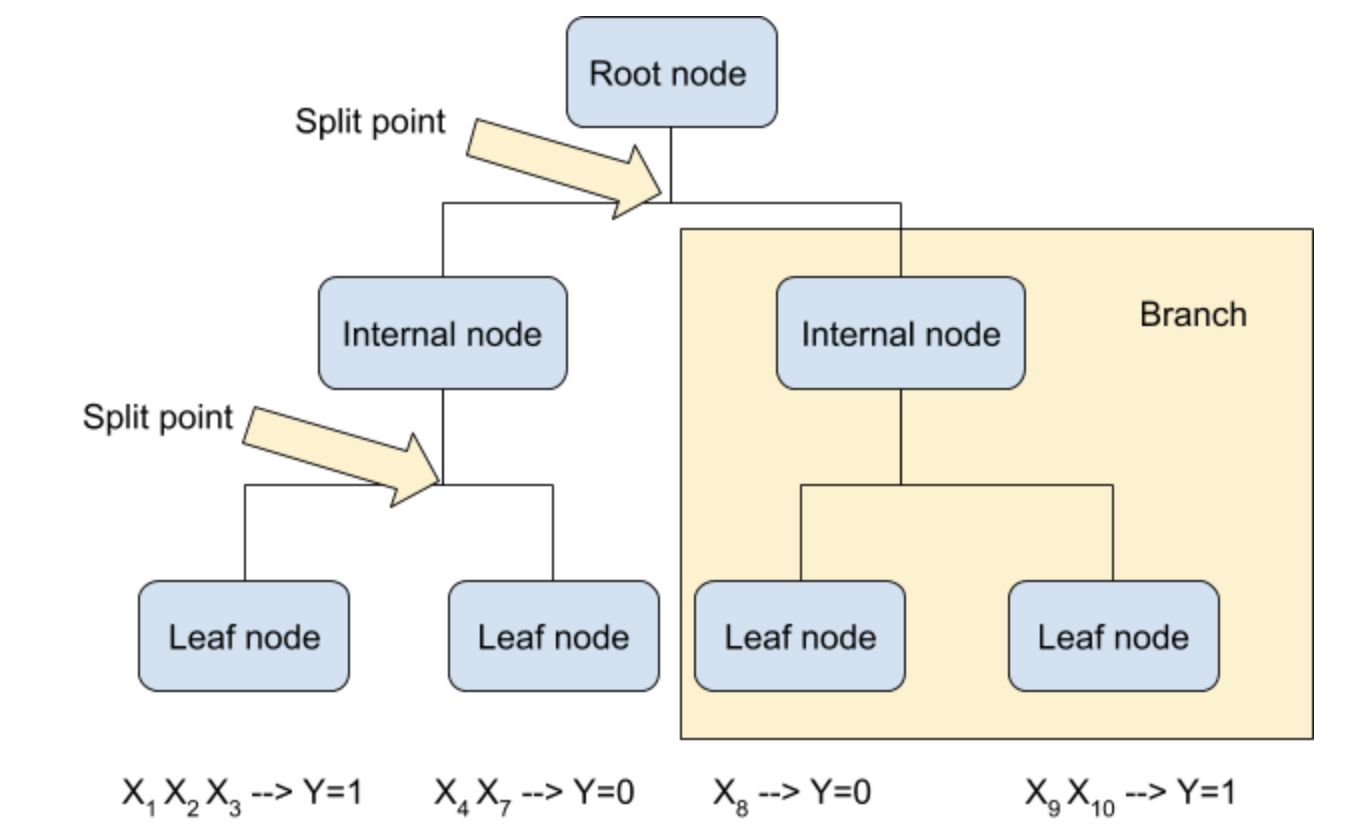

### Metrics for Decision Tree Classifiers

Dans les problèmes de classification, les deux métriques les plus populaires pour déterminer le point de séparation sont l'impureté de Gini et le gain d'information :

- L'impureté de Gini : Comme son nom l'indique, cette mesure permet d'évaluer le degré de "pureté" de nos séparations. Si une division se traduit par la prédominance d'une classe par rapport à une autre, par exemple 80 % de la classe A et 20 % de la classe B, cela signifie que la division est pure à 80 %. L'algorithme essaie itérativement de trouver des pourcentages comme ceux-ci de valeurs indépendantes, qui produisent des classes homogènes.


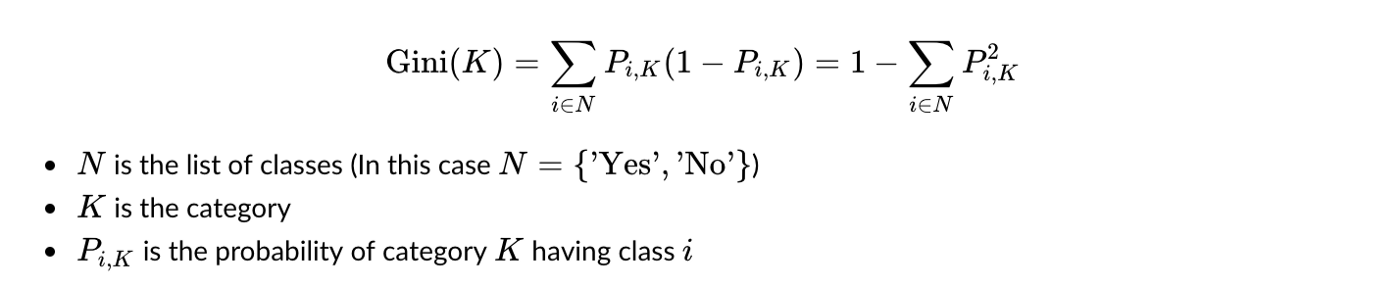

## Computation of Gini Impurity for a simple dataset


In [3]:
attribute_names =  ['age', 'income','student', 'credit_rate']
class_name = 'default'
data1 ={
    'age' : ['youth', 'youth', 'middle_age', 'senior', 'senior', 'senior','middle_age', 'youth', 'youth', 'senior', 'youth', 'middle_age','middle_age', 'senior'],
    'income' : ['high', 'high', 'high', 'medium', 'low', 'low', 'low', 'medium','low', 'medium', 'medium', 'medium', 'high', 'medium'],
    'student' : ['no','no','no','no','yes','yes','yes','no','yes','yes','yes','no','yes','no'],
    'credit_rate' : ['fair', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'excellent', 'fair', 'fair', 'fair','excellent', 'excellent', 'fair', 'excellent'],
    'default' : ['no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes','yes', 'yes', 'yes', 'no']
}
df1 = pd.DataFrame (data1, columns=data1.keys())
print(df1)

           age  income student credit_rate default
0        youth    high      no        fair      no
1        youth    high      no   excellent      no
2   middle_age    high      no        fair     yes
3       senior  medium      no        fair     yes
4       senior     low     yes        fair     yes
5       senior     low     yes   excellent      no
6   middle_age     low     yes   excellent     yes
7        youth  medium      no        fair      no
8        youth     low     yes        fair     yes
9       senior  medium     yes        fair     yes
10       youth  medium     yes   excellent     yes
11  middle_age  medium      no   excellent     yes
12  middle_age    high     yes        fair     yes
13      senior  medium      no   excellent      no


In [4]:
#Calculer gini(D)
def gini_impurity (n, value_counts):
    p_sum = 0
    for val in value_counts:
        p_sum = p_sum  +  (val / n ) * (val / n ) 
    gini = 1 - p_sum
    return gini

## Class 1: Number of samples 15, Class 2: Number of samples 15 → Gini impure 0.500

In [5]:
gini_class = gini_impurity(30,[15,15])
print(f'\nGini Impurity of the class is {gini_class:.3f}')


Gini Impurity of the class is 0.500


### Class 1: Number of samples 15, Class 2: Number of samples 15, Class 3: Number of samples 15 → Gini impure 0.667

In [6]:
gini_class = gini_impurity(45,[15,15,15])
print(f'\nGini Impurity of the class is {gini_class:.3f}')


Gini Impurity of the class is 0.667


### Class 1: Number of samples 18, Class 2: Number of samples 12 → Gini impure 0.480

In [7]:
gini_class = gini_impurity(30,[18,12])
print(f'\nGini Impurity of the class is {gini_class:.3f}')


Gini Impurity of the class is 0.480


### Class 1: Number of samples 30, Class 2: Number of samples 0 → Gini impure 0.000

In [8]:
gini_class = gini_impurity(30,[30,0])
print(f'\nGini Impurity of the class is {gini_class:.3f}')


Gini Impurity of the class is 0.000


## [Problem 2] Function for finding information gain


- Le gain d'information : Le gain d'information mesure si nous diminuons ou non l'entropie du système après le fractionnement. L'entropie, quant à elle, est définie comme le degré de chaotique de notre système. Cela peut sembler abstrait, mais le concept est plutôt intuitif. Si notre arbre de décision était divisé au hasard sans aucune structure, nous nous retrouverions avec des divisions de classes mixtes (par exemple, 50 % de classe A et 50 % de classe B). Le chaos. Mais si la division entraîne un tri des classes dans leurs propres branches, nous nous retrouvons avec un système plus structuré et moins chaotique.


In [19]:
# total = 65 sample
# root node = class 1 : 30 samples, class 2 : 35 samples


# l'impurete de gini a la racine
root_gini = gini_impurity(65,[30,35])

def informarion_gain(left,rigth):

  """
  fonction qui calcule le gain d'information
  left = noeux de gauche
  rigth = noeux de droit

  """
  nLeft = sum(left)
  nRigth = sum(rigth)
  nAll = nLeft + nRigth

  giniLeft = gini_impurity(nLeft,left)
  giniRigth = gini_impurity(nRigth,rigth)

  Ig = root_gini - (nLeft/nAll)*giniLeft - (nRigth/nAll)*giniRigth

  return Ig


In [20]:
ig = informarion_gain([10,30],[20,5])

print(f'\ninforntation gain is {ig:.3f}')


inforntation gain is 0.143


In [21]:
def entropy(y):
    hist = np.bincount(y)
    ps = hist / len(y)
    return -np.sum([p * np.log2(p) for p in ps if p > 0])
  
# [Problem 7] (Advance assignment) Creation of a decision tree classifier class with a depth of 2
# [Problem 8] (Advance assignment) Creation of decision tree classifier class with unlimited depth

class Node:

    def __init__(self, feature=None, threshold=None, left=None, right=None, *, value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value

    def is_leaf_node(self):
        return self.value is not None

In [22]:
class ScratchDecesionTreeClassifierDepth1():
    """
    Depth 1 decision tree classifier scratch implementation
    Parameters
    ----------
    verbose : bool
      True to output the learning process
    """
    def __init__(self, verbose=False, min_samples_split=2, max_depth=100, n_feats=None):
        # Record hyperparameters as attributes
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        self.n_feats = n_feats
        self.root = None
        self.verbose = verbose


    def fit(self, X, y):
        """
        Learn the decision tree classifier
        Parameters
        ----------
        X : The following forms of ndarray, shape (n_samples, n_features)
            Features of training data
        y : The following form of ndarray, shape (n_samples,)
            Correct answer value of training data
        """
        self.n_feats = X.shape[1] if not self.n_feats else min(self.n_feats, X.shape[1])
        self.root = self._grow_tree(X, y)
            
            
        if self.verbose:
          print()
        
    def predict(self, X):
        """
        Estimate the label using a decision tree classifier
        """
        return np.array([self._traverse_tree(x, self.root) for x in X])
    
    def _grow_tree(self, X, y, depth=0):
        n_samples, n_features = X.shape
        n_labels = len(np.unique(y))

        #stopping criteria
        if (depth >= self.max_depth
                or n_labels == 1
                or n_samples < self.min_samples_split):
            leaf_value = self._most_common_label(y)
            return Node(value=leaf_value)

        feat_idxs = np.random.choice(n_features, self.n_feats, replace=False)

        #greedily select the best split according to information gain
        best_feat, best_thresh = self._best_criteria(X, y, feat_idxs)
        
        #grow the children that result from the split
        left_idxs, right_idxs = self._split(X[:, best_feat], best_thresh)
        left = self._grow_tree(X[left_idxs, :], y[left_idxs], depth+1)
        right = self._grow_tree(X[right_idxs, :], y[right_idxs], depth+1)
        return Node(best_feat, best_thresh, left, right)

    def _best_criteria(self, X, y, feat_idxs):
        best_gain = -1
        split_idx, split_thresh = None, None
        for feat_idx in feat_idxs:
            X_column = X[:, feat_idx]
            thresholds = np.unique(X_column)
            for threshold in thresholds:
                gain = self._information_gain(y, X_column, threshold)

                if gain > best_gain:
                    best_gain = gain
                    split_idx = feat_idx
                    split_thresh = threshold

        return split_idx, split_thresh

    def _information_gain(self, y, X_column, split_thresh):
        #parent loss
        parent_entropy = entropy(y)

        #generate split
        left_idxs, right_idxs = self._split(X_column, split_thresh)

        if len(left_idxs) == 0 or len(right_idxs) == 0:
            return 0

        #compute the weighted avg. of the loss for the children
        n = len(y)
        n_l, n_r = len(left_idxs), len(right_idxs)
        e_l, e_r = entropy(y[left_idxs]), entropy(y[right_idxs])
        child_entropy = (n_l / n) * e_l + (n_r / n) * e_r

        #information gain is difference in loss before vs. after split
        ig = parent_entropy - child_entropy
        return ig

    def _split(self, X_column, split_thresh):
        left_idxs = np.argwhere(X_column <= split_thresh).flatten()
        right_idxs = np.argwhere(X_column > split_thresh).flatten()
        return left_idxs, right_idxs

    def _traverse_tree(self, x, node):
        if node.is_leaf_node():
            return node.value

        if x[node.feature] <= node.threshold:
            return self._traverse_tree(x, node.left)
        return self._traverse_tree(x, node.right)

    def _most_common_label(self, y):
        counter = Counter(y)
        most_common = counter.most_common(1)[0][0]
        return most_common


## Learning

In [23]:
from sklearn.datasets import load_iris
iris = load_iris()

X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=123)

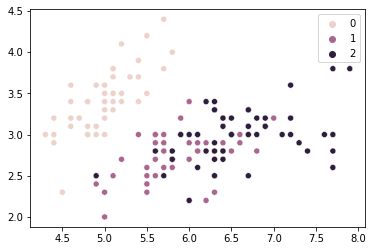

In [24]:
sns.scatterplot(x=X[:,0],y=X[:,1],hue=y)

## [Problem 4] Estimate


## [Problem 5] Learning and estimation

### with scratch Descisioin 

In [25]:
model = ScratchDecesionTreeClassifierDepth1(verbose=True)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(y_pred)


[1 2 2 1 0 2 1 0 0 1 2 0 1 2 2 2 0 0 1 0 0 1 0 2 0 0 0 2 2 0]


In [26]:
print("accuracy: {}".format(accuracy_score(y_test,y_pred)))

accuracy: 0.9666666666666667


### with sklearn 

In [27]:
d_tree = DecisionTreeClassifier(max_depth=1)
d_tree.fit(X_train,y_train)
y_pred_sk = d_tree.predict(X_test)
print("accuracy: {}".format(accuracy_score(y_test,y_pred_sk)))

accuracy: 0.6333333333333333


# [Problem 6] Visualization of decision area

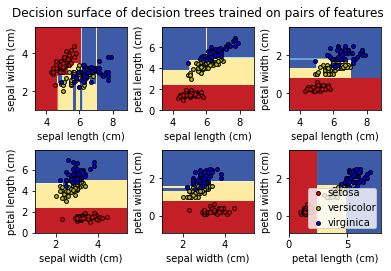

In [28]:
# Parameters
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Train
    clf = DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step)
    )
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(
            X[idx, 0],
            X[idx, 1],
            c=color,
            label=iris.target_names[i],
            cmap=plt.cm.RdYlBu,
            edgecolor="black",
            s=15,
        )

plt.suptitle("Decision surface of decision trees trained on pairs of features")
plt.legend(loc="lower right", borderpad=0, handletextpad=0)
_ = plt.axis("tight")

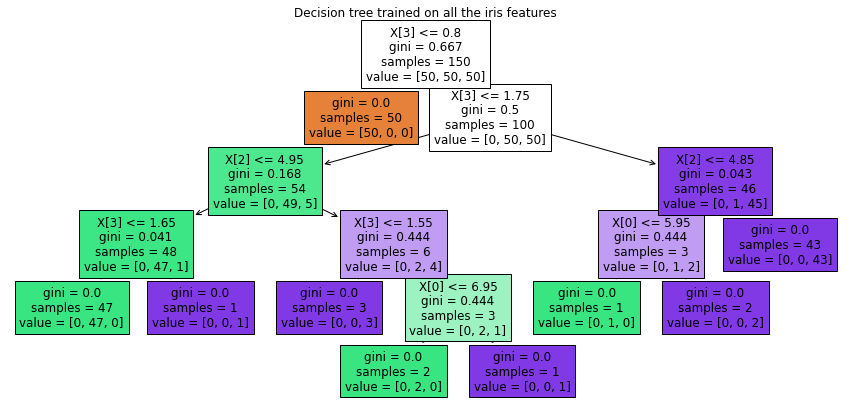

In [29]:
plt.figure( figsize=(15,7))
clf = DecisionTreeClassifier().fit(iris.data, iris.target)
plot_tree(clf, filled=True)
plt.title("Decision tree trained on all the iris features")
plt.show()